# Phase diagram of Lotka-Volterra equation 

In [59]:
from IPython.display import HTML      # For animation.
from matplotlib import animation      # For animation.
from matplotlib import pyplot as plt  # For plotting.
import numpy as np                    # For solving ODE.
from scipy.integrate import odeint    # For solving ODE.

In [60]:
# Parameters.
a = 0.5
b = 0.01
c = 0.1
d = 0.01

t0 = 0.0    # Initial time.
t1 = 100.0  # Final time.
y0 = [      # Multiple initial conditions.
    [20, 50],
    [25, 50],
    [30, 50],
    [35, 50],
    [40, 50],
    [45, 50],
    [50, 50],
    [55, 50],
    [60, 50],
    [65, 50],
]
N = len(y0)  # How many different initial conditions?

# Model.
F = lambda y, t: [
    y[0] * (a - b * y[1]),   # How population 0 changes.
    y[1] * (-c + d * y[0]),  # How population 1 changes.
]

# F = lambda y, t: [
#    (r1* y[0]/K1) * (K1 - y[0] - a12 * y[1]),   # How population 0 changes.
#     (r2* y[1]/K2) * (K2 - y[1] - a21 * y[0]),  # How population 1 changes.
# ]

In [61]:
# Solve ODE.
t = np.linspace(t0, t1, 1000)
y = [odeint(F, y0[n], t) for n in range(N)]

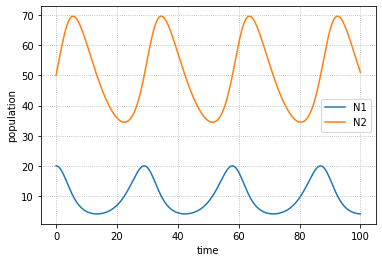

In [62]:
# Plot population vs. time.
# Show only first set of initial conditions.
plt.plot(t, y[0][:, 0], label='N1')
plt.plot(t, y[0][:, 1], label='N2')
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.legend()
plt.savefig('saved_figure.png')
plt.show()
# plt.savefig('saved_figure.png')

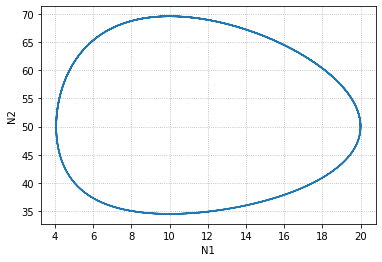

In [63]:
# Population-population plot (phase diagram).
# Only for the first set of initial conditions.
plt.plot(y[0][:, 0], y[0][:, 1])
plt.xlabel('N1')
plt.ylabel('N2')
plt.grid(linestyle=':')
plt.show()

## Phase diagram animation

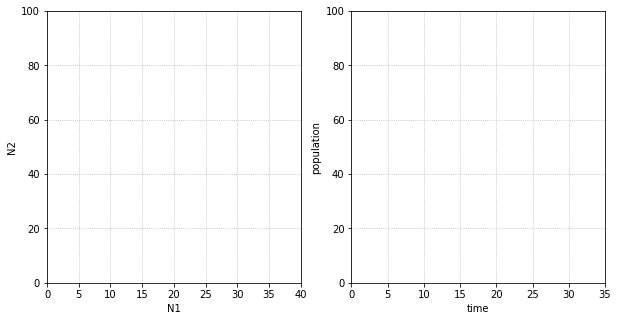

In [68]:
# Animate the first set.
# We have two plots:
#   Left  -- phase diagram,
#   Right -- time-population plot.
FRAMES = 100
CUT_T = 0.35  # Show only first 35% of the interval [t0, t1].

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))  # Two plots side by side.

# Left plot (phase diagram).
ax[0].grid(linestyle=':')
ax[0].set_xlim((0, 40))  # Range of x-axis.
ax[0].set_ylim((0, 100))  # Range of y-axis.
ax[0].set_xlabel('N1')
ax[0].set_ylabel('N2')

# Right plot (time-population).
ax[1].grid(linestyle=':')
ax[1].set_xlim((t0, t0 + (t1 - t0) * CUT_T))  # Range of x-axis.
ax[1].set_ylim((0, 100))  # Range of y-axis.
ax[1].set_xlabel('time')
ax[1].set_ylabel('population')

line_pp  = ax[0].plot([], [], lw=2)[0]
line_tp0 = ax[1].plot([], [], lw=2)[0]
line_tp1 = ax[1].plot([], [], lw=2)[0]

def init():
    # Initially, all lines are empty.
    line_pp.set_data([], [])
    line_tp0.set_data([], [])
    line_tp1.set_data([], [])
    return [line_pp, line_tp0, line_tp1]

def animate(i):
    k = int(len(t) * CUT_T * i / FRAMES)
    line_pp.set_data(y[0][:k, 0], y[0][:k, 1])
    line_tp0.set_data(t[:k], y[0][:k, 0])
    line_tp1.set_data(t[:k], y[0][:k, 1])
    return [line_pp, line_tp0, line_tp1]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=100, blit=True)

In [69]:
# Create a video.
HTML(anim.to_html5_video())

## Phase diagram and multiple initial conditions

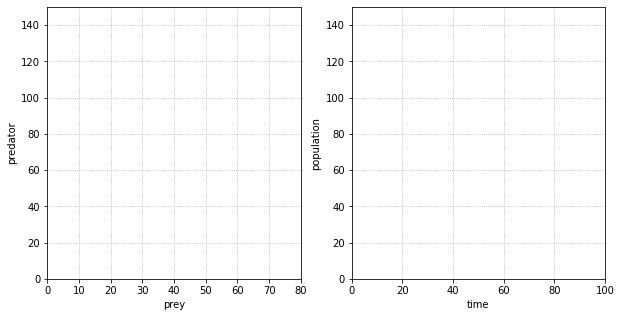

In [66]:
# Now, show phase diagrams for all sets of initial conditions.
# We have two plots:
#   Left  -- phase diagram (all sets together, each frame one new set added)
#   Right -- time-population plot for the current set. 

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))  # Two plots side by side.

# Left plot (phase diagram).
ax[0].grid(linestyle=':')
ax[0].set_xlim((0, 80))  # Range of x-axis.
ax[0].set_ylim((0, 150))  # Range of y-axis.
ax[0].set_xlabel('prey')
ax[0].set_ylabel('predator')

# Right plot (time-population).
ax[1].grid(linestyle=':')
ax[1].set_xlim((t0, t1))  # Range of x-axis.
ax[1].set_ylim((0, 150))  # Range of y-axis.
ax[1].set_xlabel('time')
ax[1].set_ylabel('population')

lines_pp = [ax[0].plot([], [], lw=2)[0] for n in range(N)]
line_tp0 = ax[1].plot([], [], lw=2)[0]
line_tp1 = ax[1].plot([], [], lw=2)[0]

def init():
    for line in lines_pp:
        line.set_data([], [])
    line_tp0.set_data([], [])    
    line_tp1.set_data([], [])    
    
    # Return the list of all lines.
    return lines_pp + [line_tp0, line_tp1]

def animate(i):
    # Only update lines that are updated, others will
    # take the values from the previous frame.
    lines_pp[i].set_data(y[i][:, 0], y[i][:, 1])
    line_tp0.set_data(t, y[i][:, 0])
    line_tp1.set_data(t, y[i][:, 1])
    return lines_pp + [line_tp0, line_tp1]

anim2 = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=N, interval=500, blit=True)

In [67]:
# Create a video.
HTML(anim2.to_html5_video())